In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
%run twisted_graphene.py

In [83]:
def graphene_bilayer(p,q,hop_range,hop_ratio):
    g=TwistedBilayerGraphene(p,q)
    g.calc_hops(hop_range)
    g.set_kpath(g.path_GMKG,[100,80,100])
    g.set_hamiltonian(hop_ratio*2.8922/0.3155,0.0)
    g.calc_bands(4,0.0)
    return g

In [84]:
from ipywidgets import interact

In [85]:
@interact(p=(0,1,1),q=(0,1,1),n_inter=(0,9,1),hop_ratio=(0.01,1.0,0.01))
def plot(p=1,q=0,n_inter=1,hop_ratio=0.11):
    hop_range=np.sqrt(distances_intra[n_inter-1]**2+3.35**2) if n_inter>0 else 1.43
    g=graphene_bilayer(p,q,hop_range,hop_ratio)
    
    plt.plot(g.ell,g.bands/2.8922,lw=0.5)
    
    plt.grid(True,alpha=0.4)
    plt.xlim((g.ell[0],g.ell[-1]))
    plt.xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
    plt.ylim((-4,4))
    plt.ylabel('$\\varepsilon(\mathbf{k})/t_1$')
    plt.title(f'$\\theta = {g.theta*180/np.pi:.2f}^\circ$, $n_{{inter}}={n_inter}$, $t_{{\\perp}}/t_1={hop_ratio:.2f}$')

    plt.show()

interactive(children=(IntSlider(value=1, description='p', max=1), IntSlider(value=0, description='q', max=1), …

In [129]:
def graphene_bilayer(p,q,hop_range,hop_ratio):
    g=TwistedBilayerGraphene(p,q)
    g.calc_hops(hop_range)
    g.set_kpath(g.path_GMKG,[100,100,100])
    g.set_hamiltonian(hop_ratio*2.8922/0.3155,0.0)
    g.calc_bands(26,0.0)
    return g

In [131]:
@interact(p=(1,10,1),q=(1,10,1),d_inter=(0.1,8.7,0.1),hop_ratio=(0.01,1.0,0.01))
def plot(p=1,q=1,d_inter=3.36,hop_ratio=0.11):
    g=graphene_bilayer(p,q,d_inter,hop_ratio)
    
    plt.plot(g.ell,g.bands/2.8922,lw=0.5)
    
    plt.grid(True,alpha=0.4)
    plt.xlim((g.ell[0],g.ell[-1]))
    plt.xticks(g.ell[g.kticks],['$\mathbf{K}$','$\mathbf{\Gamma}$','$\mathbf{M}$',"$\mathbf{K}'$"])
    # plt.ylim((-4,4))
    plt.ylabel('$\\varepsilon(\mathbf{k})$ [eV]')
    plt.title(f'$\\theta = {g.theta*180/np.pi:.2f}^\circ$, $d_{{inter}}={d_inter:.2f}$ Å, $t_{{\\perp}}/t_1={hop_ratio:.2f}$')

    plt.show()

interactive(children=(IntSlider(value=1, description='p', max=10, min=1), IntSlider(value=1, description='q', …

In [6]:
g1=grapheneAB(0.1)
g2=grapheneAB(0.45)
g3=grapheneAB(0.8)

/tmp/ipykernel_71610/2588590142.py:30: RuntimeWarning: invalid value encountered in true_divide
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/tmp/ipykernel_71610/2588590142.py:31: RuntimeWarning: invalid value encountered in true_divide
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


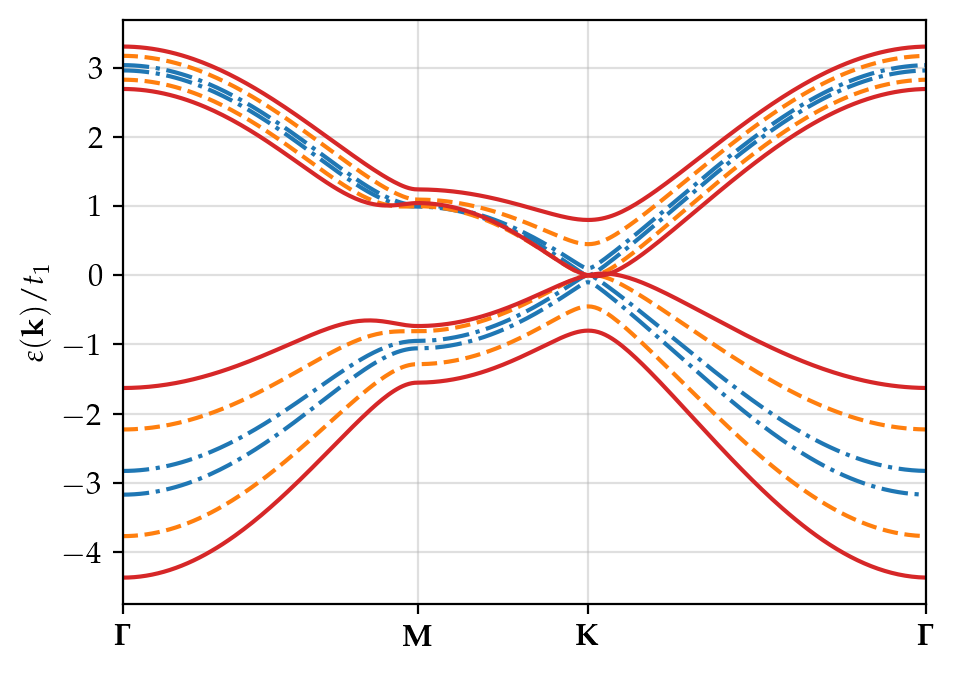

In [8]:
plt.plot(g1.ell,g1.bands/2.8922,'-.',color='tab:blue')
plt.plot(g2.ell,g2.bands/2.8922,'--',color='tab:orange')
plt.plot(g3.ell,g3.bands/2.8922,'-',color='tab:red')

plt.grid(True,alpha=0.4)
plt.xlim((g1.ell[0],g1.ell[-1]))
plt.xticks(g1.ell[g1.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
plt.ylabel('$\\varepsilon(\mathbf{k})/t_1$')

plt.savefig('Fig15_graphene_AB_band_structure_change_hops.svg')

plt.show()